In [69]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [70]:
df=pd.read_csv('rock_density_xray.csv')
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<Axes: xlabel='Rebound Signal Strength nHz', ylabel='Rock Density kg/m3'>

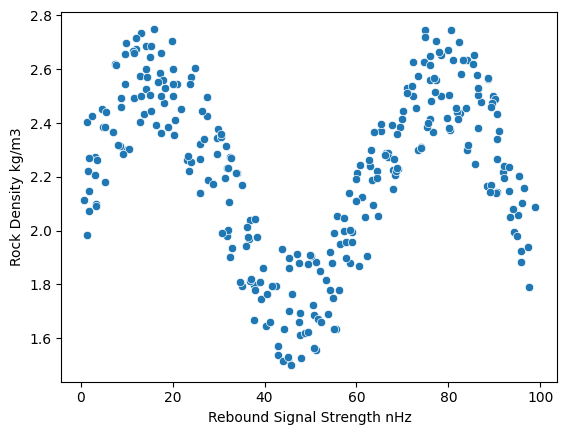

In [71]:
sns.scatterplot(x='Rebound Signal Strength nHz',y='Rock Density kg/m3',data=df)

In [72]:
df.columns=['Signal',"Density"]

In [73]:
X = df['Signal'].values.reshape(-1,1)  
y = df['Density']

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=101)

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [76]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

RMSE : 0.12532304233697542
RMSE : 0.13604408889422734
RMSE : 0.13383776495180066


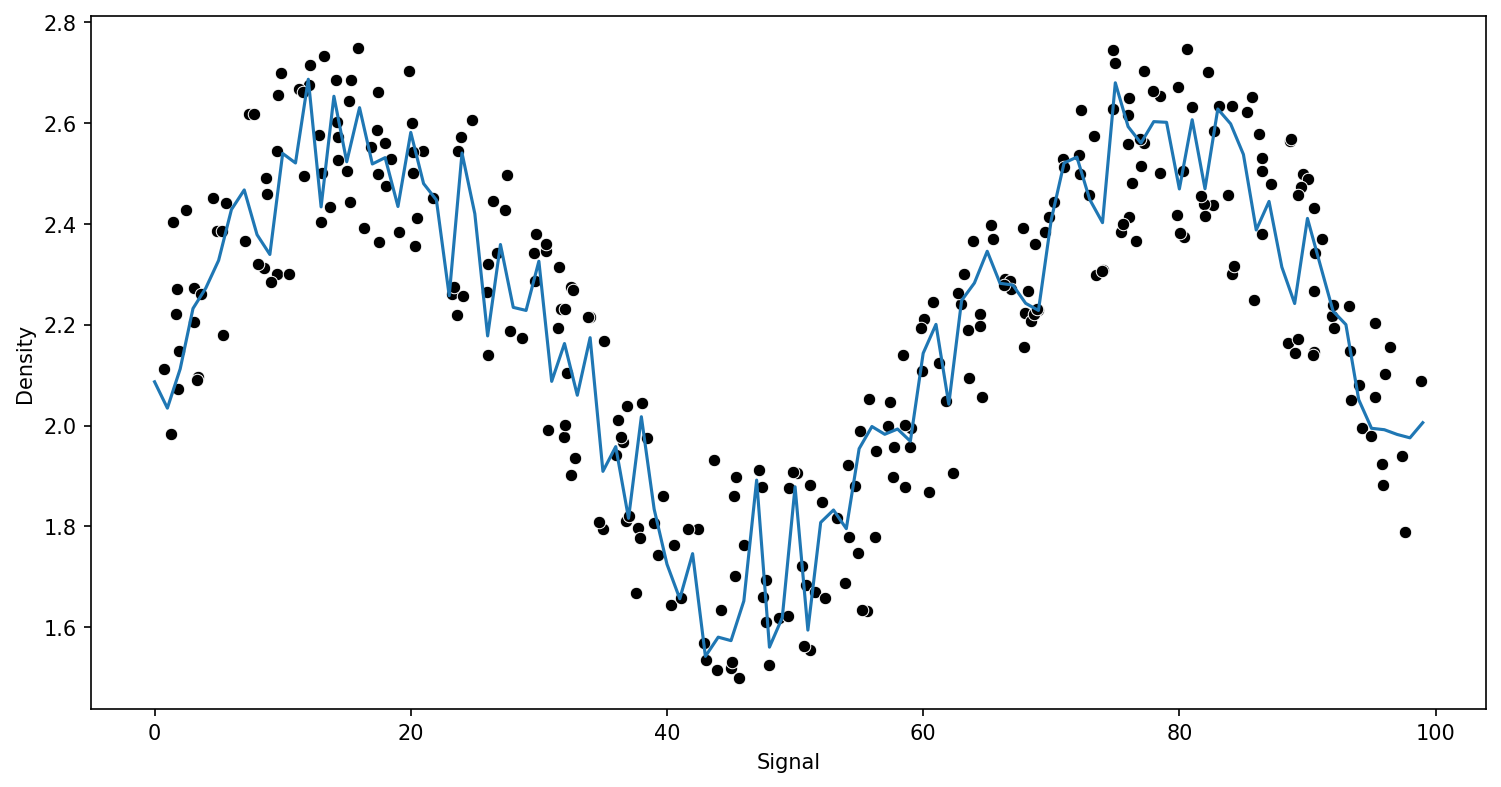

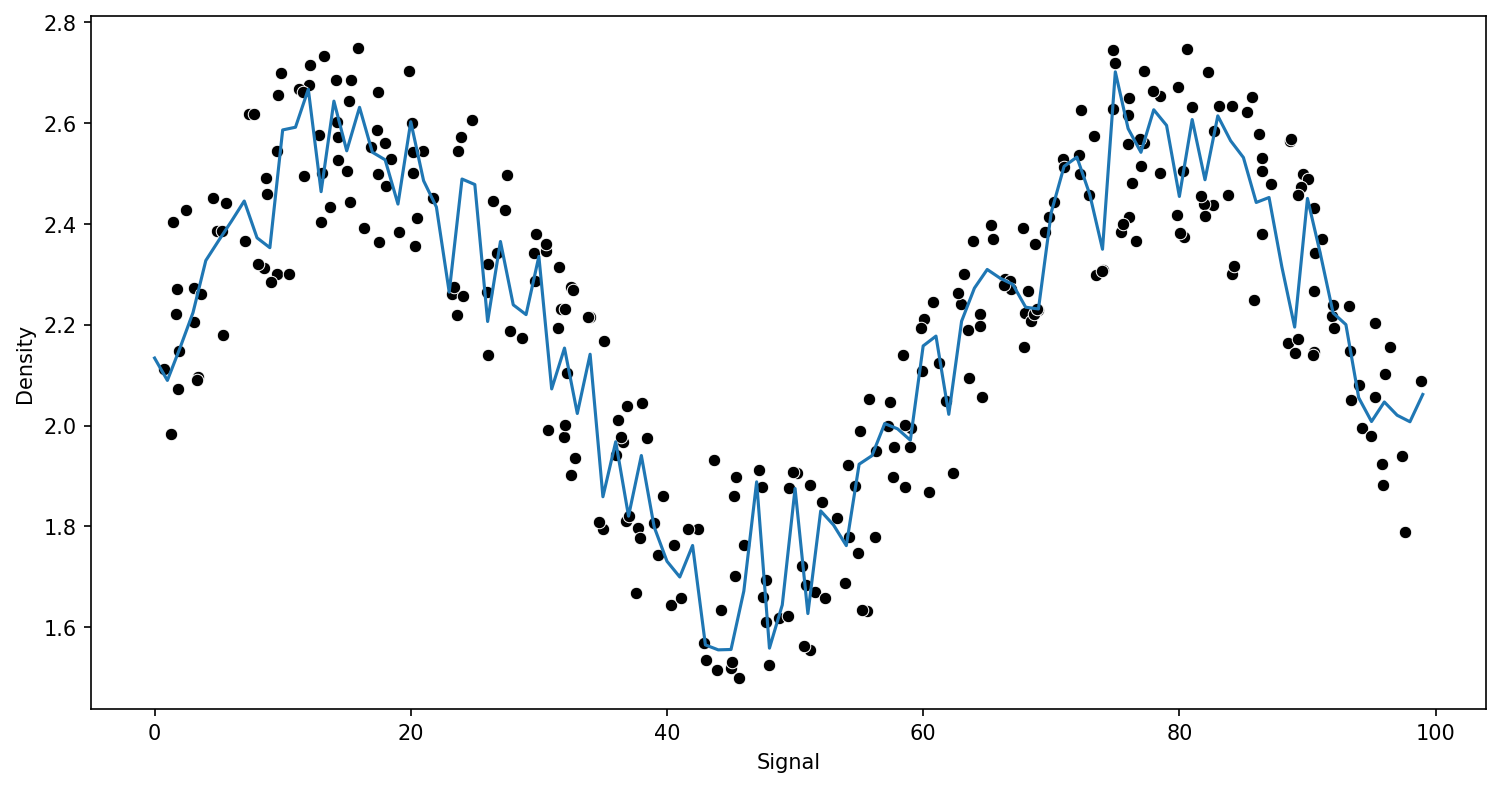

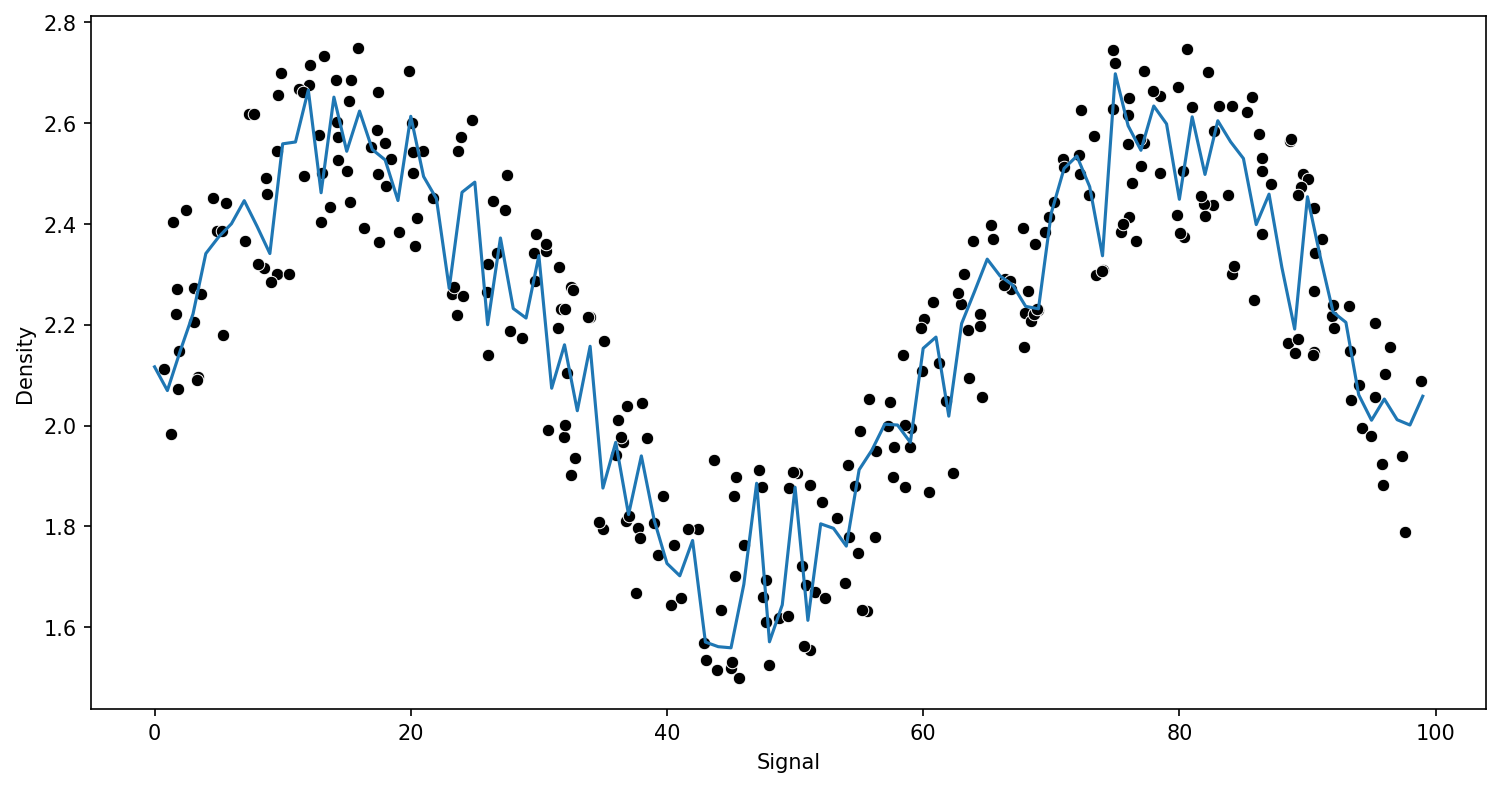

In [77]:
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n,random_state=42)
    
    run_model(model,X_train,y_train,X_test,y_test)